# Advent of code 2024

It's time for AOC 2024! This time, I will put all answers in one notebook, so we can get a nice overview of runtimes and answers over time. To brighten things up a bit, I added some (AI generated) images corresponding to the problem description. 

In [85]:
import backend

backend.run_results = list()

<img src='notebook_images/day1.webp'/>

# Day 1 : <a href="https://adventofcode.com/2024/day/1">Historian Hysteria</a>

## Part 1

For our first problem we will need to sort two lists, and take the sum of each pair of numbers in the sorted lists. Again, I will use my file parser to convert the input to some tuples, and convert them into a NumPy array.

In [86]:
test_input = backend.parseInput("""3   4
4   3
2   5
1   3
3   9
3   3""", parseMethod = backend.parseInts)


def day_1_part_1(lines : list):
    first_list = sorted(tuple(line[0] for line in lines))
    second_list = sorted(tuple(line[1] for line in lines))
    differences = (abs(first_list[i] - second_list[i]) for i in range(len(first_list)))
    return(sum(differences))

backend.test(day_1_part_1, test_input, 11)


__________ Input to be parsed __________
3   4
4   3
2   5
1   3
3   9
... and maybe more
____________________
__________ Parsed input __________
(3, 4)
(4, 3)
(2, 5)
(1, 3)
(3, 9)
... and maybe more
____________________
Answer: 11            0.000012 seconds
Test succeeded.


In [87]:
real_input = backend.parseInput(open("inputs/day1.txt").read(), backend.parseInts)

backend.run(day_1_part_1, real_input, 1, 1)

__________ Input to be parsed __________
76309   75213
79731   28444
29583   71339
60992   99148
34680   74530
... and maybe more
____________________
__________ Parsed input __________
(76309, 75213)
(79731, 28444)
(29583, 71339)
(60992, 99148)
(34680, 74530)
... and maybe more
____________________
Answer for day 1 part 1: 1110981  Average time  0.000505 seconds


1110981

That was easy! Now on to part 2.

## Part 2

It turns out that our first list contains ID's and we need to count each ID in the second list. We multiply the ID by the number of occurences in the second list, to obtain the <b>Similarity score</b>.

In [88]:
def day_1_part_2(lines : list):
    first_list = tuple(line[0] for line in lines)
    second_list = tuple(line[1] for line in lines)
    similarity_scores = map(lambda e: e * second_list.count(e), first_list)
    return(sum(similarity_scores))
    

backend.test(day_1_part_2, test_input, 31)

Answer: 31            0.000012 seconds
Test succeeded.


In [89]:
backend.run(day_1_part_2, real_input, 1, 2)

Answer for day 1 part 2: 24869388  Average time  0.011216 seconds


24869388

Day 1 was quite doable, as ever with AOC. Let's see what day 2 brings us!

<img src='notebook_images/day2.webp'/>

# Day 2 : <a href="https://adventofcode.com/2024/day/2">Red-Nosed Reports</a>

Today, we are tasked with classifying reports whether they are either <b>safe</b> or <b>unsafe</b>.
Safe reports contain numbers in strictly increasing or strictly decreasing order (i.e. monotonic), where the increments, or decrements do not exceed 3.

For this, I introduce a function called `diff_tuple` which generates a tuple that represents the running difference of another tuple.

## Part 1


In [90]:
test_input = backend.parseInput("""7 6 4 2 1
1 2 7 8 9
9 7 6 2 1
1 3 2 4 5
8 6 4 4 1
1 3 6 7 9""", parseMethod = backend.parseInts)

def diff_tuple(t : tuple) -> tuple:
    """Returns a tuple with the one-step differences"""
    return tuple(t[i + 1] - t[i] for i in range(len(t)-1))

def is_monotonic_tuple(t : tuple) -> bool:
    """Check is a tuple either strictly increases or decreases"""
    diff_t = diff_tuple(t)
    return min(diff_t) * max(diff_t) > 0

def is_safe(report : tuple) -> bool:
    monotonic = is_monotonic_tuple(report)
    safe_abs_change = max(diff_tuple(report)) <= 3 and min(diff_tuple(report)) >= -3
    return(monotonic * safe_abs_change)

def day_2_part_1(reports : list):
    map_obj = map(is_safe, reports)
    return(sum(map_obj))

backend.test(day_2_part_1, test_input, 2)

__________ Input to be parsed __________
7 6 4 2 1
1 2 7 8 9
9 7 6 2 1
1 3 2 4 5
8 6 4 4 1
... and maybe more
____________________
__________ Parsed input __________
(7, 6, 4, 2, 1)
(1, 2, 7, 8, 9)
(9, 7, 6, 2, 1)
(1, 3, 2, 4, 5)
(8, 6, 4, 4, 1)
... and maybe more
____________________
Answer: 2            0.000030 seconds
Test succeeded.


In [91]:
real_input = backend.parseInput(open("inputs/day2.txt").read(), parseMethod = backend.parseInts)
backend.run(day_2_part_1, real_input, 2, 1)

__________ Input to be parsed __________
20 21 24 25 27 29 27
60 61 62 64 64
15 18 21 22 25 26 30
5 8 11 14 16 19 20 26
20 22 20 23 24
... and maybe more
____________________
__________ Parsed input __________
(20, 21, 24, 25, 27, 29, 27)
(60, 61, 62, 64, 64)
(15, 18, 21, 22, 25, 26, 30)
(5, 8, 11, 14, 16, 19, 20, 26)
(20, 22, 20, 23, 24)
... and maybe more
____________________
Answer for day 2 part 1: 526  Average time  0.003934 seconds


526

## Part 2

It turns out that the facility contains a <b>problem dampener</b>, that can remove a single element from a report to make it safe. We now need to figure out how many reports are safe after the problem dampener removed a single element from a report to make it safe (if possible). For this, I use a simple approach by checking whether we obtain a safe list by removing any element from the report.

In [92]:
def list_without(l : list, i: int) -> list:
    """Returns a list with index i removed"""
    l_copy = l.copy()
    l_copy.pop(i)
    return(l_copy)

def problem_dampener(report : tuple):
    if is_safe(report) : return True
    report_list = list(report)
    return(sum(map(lambda e : is_safe(list_without(report_list, e)), range(len(report_list)))) > 0)
    
def day_2_part_2(input):
    map_obj = map(problem_dampener, [report for report in input])
    return(sum(map_obj))

backend.test(day_2_part_2, test_input, 4)

Answer: 4            0.000148 seconds
Test succeeded.


In [93]:
backend.run(day_2_part_2, real_input, 2, 2)

Answer for day 2 part 2: 566  Average time  0.016862 seconds


566

# Statistics AOC 2024

In [94]:
backend.overall_results()

,Day,Part,Result,Time
0,1,1,1110981,0.000505
1,1,2,24869388,0.011216
2,2,1,526,0.003934
3,2,2,566,0.016862


In [95]:
backend.complexity_increase_per_day()

Day
1    22.194945
2     4.286648
Name: Time, dtype: float64

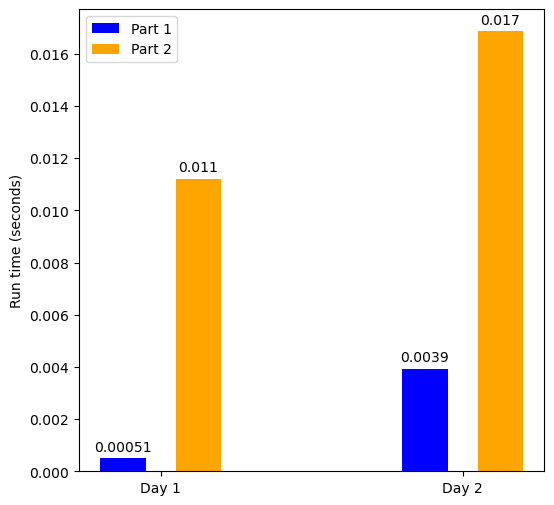

In [96]:
backend.plot_results()